<a href="https://colab.research.google.com/github/Aanyajain/Neural-Network/blob/master/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mp
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [ ]:
x_train

array([[   3.5214    ,   15.        ,    3.04994451, ...,    1.60599334,
          37.63      , -122.43      ],
       [   5.3275    ,    5.        ,    6.49005964, ...,    3.44333996,
          33.69      , -117.39      ],
       [   3.1       ,   29.        ,    7.54237288, ...,    2.25084746,
          38.44      , -122.98      ],
       ...,
       [   1.5561    ,   35.        ,    4.13993174, ...,    3.27645051,
          34.11      , -117.29      ],
       [   2.1055    ,   52.        ,    5.17849462, ...,    2.92688172,
          36.76      , -119.79      ],
       [   5.6022    ,   31.        ,    6.21971253, ...,    2.53798768,
          38.04      , -122.2       ]])

In [ ]:
x_train.shape


(11610, 8)

In [ ]:
x_test.shape

(5160, 8)

In [ ]:
x_train_full.shape

(15480, 8)

In [ ]:
x_valid.shape

(3870, 8)

In [ ]:
y_train_full.shape

(15480,)

In [ ]:
y_test.shape

(5160,)

In [ ]:
y_valid.shape

(3870,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid=scaler.transform(x_valid)

In [ ]:
x_train

array([[-0.19397883, -1.07781319, -0.94338545, ..., -0.57291624,
         0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, ...,  0.20516532,
        -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819, ..., -0.29983271,
         1.30872858, -1.697027  ],
       ...,
       [-1.22332336,  0.50435042, -0.51600328, ...,  0.1344908 ,
        -0.71978613,  1.14664638],
       [-0.93556989,  1.8491895 , -0.10878451, ..., -0.01354498,
         0.52168361, -0.10277075],
       [ 0.89585991,  0.1879177 ,  0.29947528, ..., -0.17823425,
         1.12133692, -1.30720885]])

In [ ]:
x_valid

array([[-0.72894678,  0.42524224, -0.72520018, ...,  0.76884409,
        -0.89312342,  0.86177927],
       [-0.53253697,  1.61186495, -0.07501671, ...,  0.22981129,
         0.96673881, -1.43714823],
       [-1.12428044, -0.36583956, -0.83039438, ..., -0.37482146,
        -1.35223299,  1.26159275],
       ...,
       [-0.38169423, -0.2076232 , -0.46608538, ...,  0.05940227,
        -0.64482947,  0.43697745],
       [-0.75078755,  0.50435042, -0.67205695, ..., -0.3343433 ,
        -1.15078695,  1.10166736],
       [-0.07665671,  0.10880952, -0.42690329, ..., -0.15910745,
        -0.87438425,  0.8567816 ]])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
keras.layers.Dense(30,activation="relu"),
keras.layers.Dense(1),                       
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["mae"])

In [ ]:
model_data=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [ ]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3727 - mae: 0.4346


In [ ]:
model_data.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.593418538570404,
  0.5557191967964172,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091808915138245,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068865299225,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583,
  0.394916296005249,
  0.392380952835083,
  0.38980725407600403,
  0.387410044670105,
  0.3850752115249634,
  0.38291803002357483,
  0.3808581829071045,
  0.3787591755390167,
  0.3769363760948181,
  0.37497687339782715],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618006587028503,
  0.5398454070091248,
  0.5237292647361755,
  0.5112563371658325,
  0.5010154247283936,
  0.492448091506958,
  0.4857262372970581,
  0.47973746061325073,
  0.4744162857532501,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.4

In [ ]:
pip install pydot

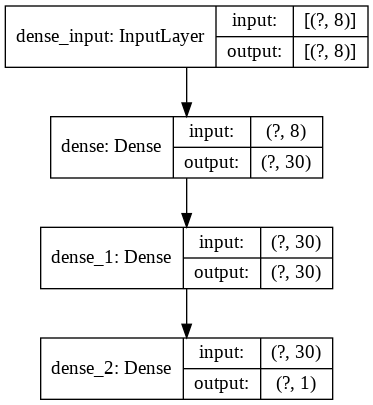

In [ ]:
import pydot
keras.utils.plot_model(model,show_shapes=True)

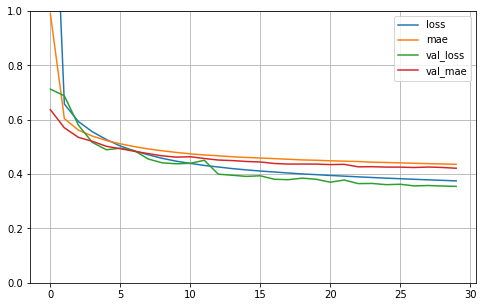

In [ ]:
import pandas as pd
pd.DataFrame(model_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
x_new=x_test[:3]

In [ ]:
y_pred=model.predict(x_new)
y_pred

array([[0.58085257],
       [1.9019513 ],
       [3.6079113 ]], dtype=float32)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

**Uding Functional API to create model for linear regression**

In [ ]:
input_=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["mae"])

In [ ]:
model_data=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3795 - mae: 0.4403


In [ ]:
model_data.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.6264881491661072,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980843544006,
  0.5107864141464233,
  0.4951668083667755,
  0.48022276163101196,
  0.4684668779373169,
  0.45896390080451965,
  0.45022058486938477,
  0.4432658851146698,
  0.4363255202770233,
  0.43062451481819153,
  0.4253447949886322,
  0.42129331827163696,
  0.4168177843093872,
  0.4126453101634979,
  0.4095856547355652,
  0.4059634208679199,
  0.40294399857521057,
  0.40004560351371765,
  0.3971884548664093,
  0.3946215510368347,
  0.39249056577682495,
  0.3904934525489807,
  0.38845309615135193,
  0.38671213388442993,
  0.3848456144332886],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.558142364025116,
  0.542133629322052,
  0.5297517776489258,
  0.518592119216919,
  0.5096290111541748,
  0.5025359392166138,
  0.4959280490875244,
  0.4896959960460663,
  0.4850703179836273,
  0.48114877939224243,
  0.4765703082084656,
  0.47358

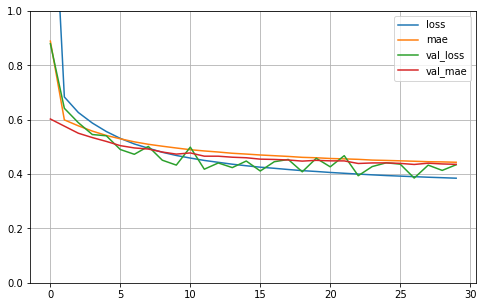

In [ ]:
import pandas as pd
pd.DataFrame(model_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Save and Restore Model**

In [ ]:
model.save("my_Func_model.h5")

In [ ]:
%pwd

'/content'

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.load_model("my_Func_model.h5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [ ]:
y_pred=model.predict(x_new)
y_pred

array([[0.7609553],
       [1.7409785],
       [3.5886006]], dtype=float32)

**Callback during training**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential([
keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
keras.layers.Dense(30,activation="relu"),
keras.layers.Dense(1),                       
])

In [ ]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [ ]:
model_data=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
keras.layers.Dense(30,activation="relu"),
keras.layers.Dense(1),                       
])

In [ ]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [ ]:
model_data=model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6817 - val_loss: 0.6645
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6283 - val_loss: 0.5944
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5868 - val_loss: 0.5505
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5510 - val_loss: 0.5211
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5225 - val_loss: 0.5055
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4993 - val_loss: 0.4648
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4442
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4649 - val_loss: 0.4304

In [ ]:
model=keras.models.load_model("Best_Model.h5")

In [ ]:
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 944us/step - loss: 0.4472


In [ ]:
mse_test

0.4472494423389435

**Early Stop Model(for very high epoch value)**

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
keras.layers.Dense(30,activation="relu"),
keras.layers.Dense(1),                       
])

In [ ]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Early_Stop_Model.h5",save_best_only=True)

In [ ]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
model_data=model.fit(x_train,y_train,epochs=200,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.0148 - val_loss: 1.4007
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7735 - val_loss: 1.3632
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6815 - val_loss: 0.8402
Epoch 4/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6134 - val_loss: 0.5897
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5652 - val_loss: 0.5373
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5242 - val_loss: 0.5175
Epoch 7/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4955 - val_loss: 0.4717
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4729 - val_loss: 0.4582
Epoch 9/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4546 - val_loss: 0.4201
Epoch 10/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4411 - val_lo

In [ ]:
model=keras.models.load_model("Early_Stop_Model.h5")
mse_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 991us/step - loss: 0.3888


In [ ]:
y_pred=model.predict(x_new)
y_pred

array([[0.71715844],
       [1.8356612 ],
       [3.6896198 ]], dtype=float32)